In [1]:
import pathlib
import os

CURRENT_FILE_LOCATION = pathlib.Path(os.getcwd())
DATASET_FILE = CURRENT_FILE_LOCATION / "spambase" / "spambase.data"
PROCESSING_RESULTS_FOLDER = CURRENT_FILE_LOCATION / "processing_results"

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(DATASET_FILE)
dataset_full_np = df.to_numpy()
dataset_full_np
features = dataset_full_np[:,:-1]
features.shape

(4600, 57)

1.0


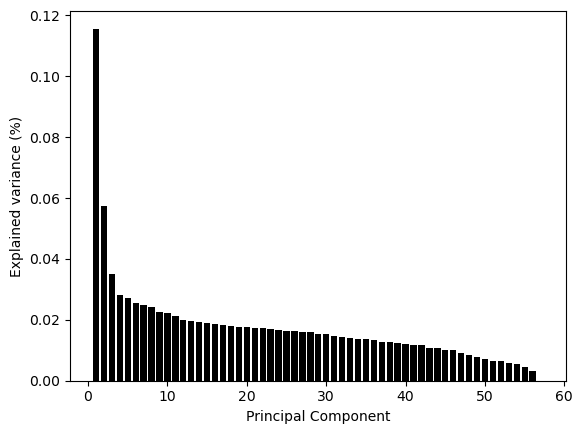

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

def plot_pcas(data):
    std_scaler = preprocessing.StandardScaler()
    features_scaled = std_scaler.fit_transform(data)

    pca = PCA(n_components=57)
    
    # Fit and transform data
    pca.fit_transform(features_scaled)
    
    # Bar plot of explained_variance
    plt.bar(
        range(1,len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_,
        color="black"
        )
    
    plt.xlabel('Principal Component')
    plt.ylabel('Explained variance (%)')
    plt.tight_layout()
    plt.savefig(CURRENT_FILE_LOCATION / "pcs.pdf")
    print(pca.explained_variance_ratio_.sum())

plot_pcas(features)


In [4]:
std_scaler = preprocessing.StandardScaler()
features_scaled = std_scaler.fit_transform(features)
pca = PCA(n_components=50)
pca_features = pca.fit_transform(features_scaled)

pca_dataset = np.concatenate((pca_features, dataset_full_np[:,-1].reshape(-1,1)), axis=1)

file_to_save_pca = str(PROCESSING_RESULTS_FOLDER / "pca50_ds.csv")
if (os.path.exists(file_to_save_pca)):
    os.remove(file_to_save_pca)
np.savetxt(file_to_save_pca, pca_dataset, delimiter=",")

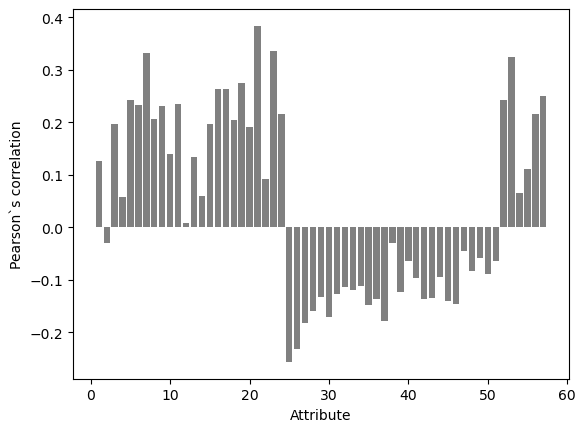

In [5]:
from sklearn import feature_selection

correlations = feature_selection.r_regression(dataset_full_np[:,:-1], dataset_full_np[:,-1])

plt.bar(
    range(1,len(correlations)+1),
    correlations,
    color="gray"
    )

plt.xlabel('Attribute')
plt.ylabel('Pearson`s correlation')
plt.tight_layout()
plt.savefig(CURRENT_FILE_LOCATION / "pearsons_correlation_plot.pdf")

In [6]:
import numpy as np
abs_correlations = np.abs(correlations)
percentage_regard_max = abs_correlations / abs_correlations.max()

filter_ = percentage_regard_max >= 0.2
filter_


array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True, False,
        True,  True,  True])

In [7]:
filter_ = np.concatenate((filter_, np.array([True])), axis=0)
dataset_new = ((dataset_full_np.T)[filter_]).T
dataset_new.shape

(4600, 48)

In [8]:
file_to_save_correlation = str(PROCESSING_RESULTS_FOLDER / "correlation_filtered_ds.csv")
if (os.path.exists(file_to_save_correlation)):
    os.remove(file_to_save_correlation)
np.savetxt(PROCESSING_RESULTS_FOLDER / "correlation_filtered_ds.csv", dataset_new, delimiter=",")